# Shaikat Islam

## HW05: CIFAR-10 Using CNNs 

### Source: https://machinelearningmastery.com/object-recognition-convolutional-neural-networks-keras-deep-learning-library/

### 1.1: Load the CIFAR-10 Dataset in Keras

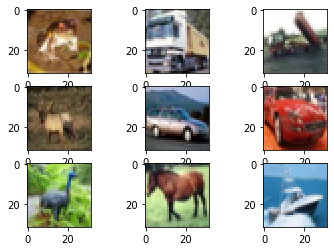

In [0]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator

from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from matplotlib import pyplot

# loading data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# small sample of 9 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(x_train[i])
pyplot.show()

### 1.2 Normalizing Input Values and Data Transformation

Here, we normalize the data by dividng each of the pixel RGB values by 255, as the range of the values is from 0-255. The data values are cast to floating point values in order to divide.

In [0]:
# normalizing inputs
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

Use one-hot encoding to convert the outputs to a data format more suited for ML tasks -- here we are converting the data to a 10x10 binary matrix. 

One-hot encoding converts categorical data to numerical data in the form of a binary matrix. This differs from integer encoding, which requires an ordinal relationship within data.

In [0]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

10


### 1.3 Baseline Convolutional Neural Network

The following baseline CNN uses a convolutional input layer, in which neurons receive input from a size 3x3 feature map (of which there are 32). Furthermore, a rectifier activation function is used (ReLU), which is the activation function for this model. The weight constraint of max norm is set to 3, which is the absolute upper bound on the size of the weight vector for every neuron. The dropout value is set to 20%, which is used to regularize the CNN by "dropping" both hidden and visible neurons. Another convolutional input layer is added to the model (the same as the first), and the max pooling layer (used to down-sample the input) is set at a size of 2x2. After the feature map is pooled, it is flattened to a column-like shape to be used as an input layer for the fully-connected layer composed of 512 hidden  neurons (using a rectifier activation function), and a dropout of 50%, followed by another fully connected layer with 10 hidden neurons and a soft-max activation function.

In [0]:
# creating the model
# linear stack of layers 
model = Sequential()
# convolutional input layer, in which neurons receive input from a size 3x3 feature map (of which there are 32)
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
# dropout value is set to 20%, which is used to regularize the CNN by "dropping" both hidden and visible neurons
model.add(Dropout(0.2))
# convolutional input layer, in which neurons receive input from a size 3x3 feature map (of which there are 32)
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
# pool feature map to 2x2
model.add(MaxPooling2D())
# flattened to a column-like shape to be used as an input layer 
model.add(Flatten())
# fully-connected layer composed of 512 hidden neurons (using a rectifier activation function)
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
# dropout of 50%
model.add(Dropout(0.5))
# fully connected layer with 10 hidden neurons and a soft-max activation function
model.add(Dense(num_classes, activation='softmax'))

### 1.4 Compiling the Model
The optimizer being used for this model is a logarithmic loss function with the stochastic gradient descent optimization algorithm with an learning rate of .01, 25 epochs, and a large momentum of 0.9.

In [0]:
epochs = 25
lrate = 0.01
decay = lrate/epochs
# stochastic gradient descent optimizer
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)              

### 1.5 Training the Model
Here we train the model with 25 epochs and a batch size of 32. It should be noted that the number of iterations is usually greater for this application, but is reduced for sake of time. 

In [0]:
# Training the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Accuracy of model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/25





50000/50000 [==============================] - 26s 526us/step - loss: 1.6851 - acc: 0.3895 - val_loss: 1.4259 - val_acc: 0.4815
Epoch 2/25
50000/50000 [==============================] - 19s 374us/step - loss: 1.3162 - acc: 0.5269 - val_loss: 1.1668 - val_acc: 0.5875
Epoch 3/25
50000/50000 [==============================] - 19s 373us/step - loss: 1.1471 - acc: 0.5919 - val_loss: 1.0692 - val_acc: 0.6219
Epoch 4/25
50000/50000 [==============================] - 19s 374us/step - loss: 1.0229 - acc: 0.6365 - val_loss: 1.0177 - val_acc: 0.6392
Epoch 5/25
50000/50000 [==============================] - 19s 381us/step - loss: 0.9246 - acc: 0.6704 - val_loss: 0.9661 - val_acc: 0.6579
Epoch 6/25
50000/50000 [==============================] - 19s 373us/step - loss: 0.8422 - acc: 0.7009 - val_loss: 0.9574 - val_acc: 0.6646
Epoch 7/25
500

### 1.6 Improving on the Baseline

The previous model had an accuracy of 70.33%, but the model can be tweaked to do better. 

The following section builds upon the last model, by introducing more convolutional layers and more feature maps (with the same pattern of convolutional, dropout, convolutional, and max pooling layers). 

The pattern is the same as the first model, except it is repeated three times, each with a 32x32, 64x64, and 128x128 sized feature map, respectively. The final dense layer is also larger, with 512 units, instead of 10 in the previous model. The number of epochs is the same, but the batch size has doubled to 64, instead of 32, as in the previous model.

In [0]:
# load data, normalize by dividing rgb vals by 255, and one-hot encode
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# same pattern as previous model, except repeated 3 times with larger feature maps
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
# larger dense layer (512 instead of 10)
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# number of epochs and learning rate stays the same, but batch size increases to 64
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

# training the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)
# accuracy of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_49 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_50 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 16, 16, 64)      

### 2.1 Training for More Epochs

The previous model used deeper network topology than the baseline, but had an increase in accuracy of 8%, with a final accuracy if 78.37%. In this section, we explore three extensions on the previous model: training for more epochs, augmenting data, and a deeper network topology (these suggestions were taken from the tutorial).

In [0]:
# load data, normalize by dividing rgb vals by 255, and one-hot encode
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# same pattern as previous model, except repeated 3 times with larger feature maps
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
# larger dense layer (512 instead of 10)
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# number of epochs quadruples and learning rate stays the same, but batch size increases to 64
epochs = 100
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

# training the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)
# accuracy of the model
scores = model.evaluate(X_test, y_test, verbose=0)
acc.append(scores)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_55 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_56 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 16, 16, 64)      

### 2.1.1 Classifier Accuracy over Training Period (Epochs = 100)

Quadrupling the number of epochs resulted in an increased accuracy of 4%, from 78.37% to 82.02%. Too many epochs can cause the model to overfit on the training data, which is why early stopping might be advisable in this case (as can be seen by the following plot, accuracy flatlines at about 80% near 30-100 epochs.)

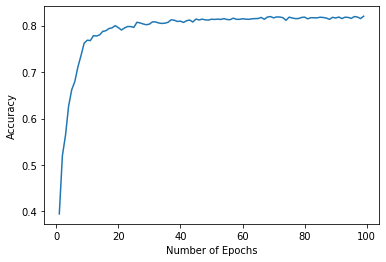

In [0]:
# It was easier to do this than re-run my model and wait another 45 mins 
val_acc = [0.3946, 0.5200, 0.5640, 0.6267, 0.6619, 0.6798, 0.7114, 0.7357 ,0.7622 ,0.7686 ,0.7678 ,0.7784 ,0.7776 ,0.7801 ,0.7876 ,0.7890 ,0.7938 ,0.7952 ,0.7999 ,0.7958 ,0.7906 ,0.7950 ,0.7981 ,0.7979, 0.7962, 0.8072, 0.8058, 0.8036, 0.8019, 0.8032, 0.8081, 0.8079, 0.8057, 0.8047, 0.8053, 0.8071, 0.8125, 0.8117, 0.8090, 0.8096, 0.8069, 0.8106, 0.8120, 0.8078, 0.8142, 0.8122, 0.8139, 0.8125, 0.8119, 0.8138, 0.8133, 0.8140, 0.8133, 0.8151, 0.8132, 0.8128, 0.8160, 0.8137, 0.8135, 0.8148, 0.8140, 0.8135, 0.8147, 0.8151, 0.8153, 0.8176, 0.8137, 0.8184, 0.8195, 0.8168, 0.8187, 0.8185, 0.8171, 0.8115, 0.8182, 0.8165, 0.8151, 0.8152, 0.8176, 0.8183, 0.8146, 0.8171, 0.8169, 0.8168, 0.8181, 0.8175, 0.8163, 0.8135, 0.8179, 0.8164, 0.8185, 0.8152, 0.8181, 0.8177, 0.8156, 0.8195, 0.8185, 0.8152, 0.8202]
num_iterations = []
for i in range(1,100):
   num_iterations.append(i)

# plotting accuracy vs. number of epochs
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Accuracy")
pyplot.plot(num_iterations, val_acc)

### 2.2 Data Augmentation 
In the following code segment, we augment the data using the ImageDataGenerator class in Keras, which transforms the actual training images by rotation, flips, normalization, and other methods. The model used is the same as used in 1.6.

Here, the rotation range is within 20 degrees, the shift in width is set to 0.1 of the image size, as is the shift in height, and the images are also flipped.

Source Used for Data Augmentation:
https://appliedmachinelearning.blog/2018/03/24/achieving-90-accuracy-in-object-recognition-task-on-cifar-10-dataset-with-keras-convolutional-neural-networks/

In [0]:
# load data, normalize by dividing rgb vals by 255, and one-hot encode
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# same pattern as previous model, except repeated 3 times with larger feature maps
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
# larger dense layer (512 instead of 10)
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# number of epochs and learning rate stays the same, but batch size increases to 64
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

# augmenting the data
data_augmentation = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True,)
data_augmentation.fit(X_train)
 
# training the model
history = model.fit_generator(data_augmentation.flow(X_train, y_train, batch_size=64),\
                    steps_per_epoch=x_train.shape[0] // 64,epochs=25,\
                    verbose=1,validation_data=(x_test,y_test))

# accuracy of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_115 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_115 (Dropout)        (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_116 (Dropout)        (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 16, 16, 64)      

### 2.2.1 Classifier Accuracy over Training Period (Epochs = 100)

Augmenting the data resulted in a decreased accuracy of 3%, from 78.37% to 75.60%. The data augmentation may have acted against training accuracy due to the possibility of over-fitting data with increased degrees of augmentation.

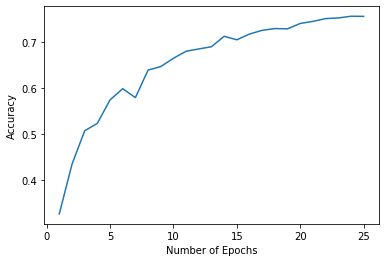

In [0]:
val_acc = history.history['val_acc']
num_iterations = []
for i in range(1,26):
   num_iterations.append(i)

# plotting accuracy vs. number of epochs
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Accuracy")
pyplot.plot(num_iterations, val_acc)

### 2.3 Increased Number of Epochs and Data Augmentation
In the following code segment, we increase the number of epochs (5) and augment data (but decrease the rotation_range to 15).

In [0]:
# load data, normalize by dividing rgb vals by 255, and one-hot encode
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# same pattern as previous model, except repeated 3 times with larger feature maps
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
# larger dense layer (512 instead of 10)
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# number of epochs and learning rate stays the same, but batch size increases to 64
epochs = 50
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

# augmenting the data
data_augmentation = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True,)
data_augmentation.fit(X_train)
 
# training the model
history = model.fit_generator(data_augmentation.flow(X_train, y_train, batch_size=64),\
                    steps_per_epoch=x_train.shape[0] // 64,epochs=epochs,\
                    verbose=1,validation_data=(x_test,y_test))

# accuracy of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_227 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_180 (Dropout)        (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_228 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_112 (MaxPoolin (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_229 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_181 (Dropout)        (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_230 (Conv2D)          (None, 16, 16, 64)      

### 2.3.1 Classifier Accuracy over Training Period (Data Augentation + 50 Epochs)

Augmenting the data resulted in an increased accuracy of 5%, from 78.37% to 83.31%. Given the results from the original data augmentation, it seems that reducing the rotation_range may have increased accuracy by reducing overfitting -- combined with an increased number of epochs (as determined by a suitable range from section 2.1, where an early-stopping step was determined to be within the range of 30-60). It seems that the data augmentation performed did not have demonstrable improvements in accuracy; decreasing the range may have reduced overfitting, but in combination with an increased number of epochs, it can be reasonably said that augmenting the data has a positive increase in accuracy.

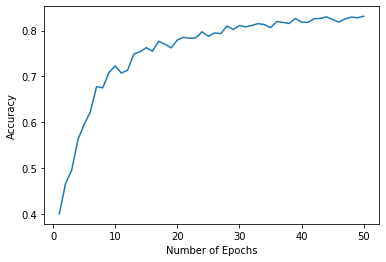

In [0]:
val_acc = history.history['val_acc']
num_iterations = []
for i in range(1,51):
   num_iterations.append(i)

# plotting accuracy vs. number of epochs
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Accuracy")
pyplot.plot(num_iterations, val_acc)

### 2.4 Conclusion

From our results, it seems that increasing the number of epochs has a positive increase in accuracy, but data augmentation must be done carefully -- that is to say, feature transformation should be chosen carefully and managed in order to reduce the risk of overfitting data. The best results came from combining the two approaches of increasing the number of epochs (to an early stop, determined by previous experiments) and using data augmentation to increase the amount of training data. In further continuations of this task, it would be interesting to see the results of using a deeper layered network, as well as introducing normalization before ouputting to the next layer.